This notebook is part 2 of the November 29, 2017 Anaconda webinar on Python data visualization; [part 1](https://anaconda.org/jbednar/exploring_data) focused on data exploration. This notebook should work well with the same ``pyviz`` environment from part 1.


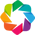

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import holoviews as hv
hv.extension('bokeh', 'matplotlib', width="100")

# Report generation: image output

Simplest case: Static image output, turning what you found interactively into a PNG or SVG image to put into a report or presentation. With any of the PNG or SVG-based approaches you can always do "Save as" on an image to export it for use externally. Bokeh's save button on plots can be used similarly, generating a PNG of the visible plot. However, it's very easy to get confused about which plot ended up being saved under which name, so for any complex collection of figures it's better to write code that reliably exports the same image to a declared filename:

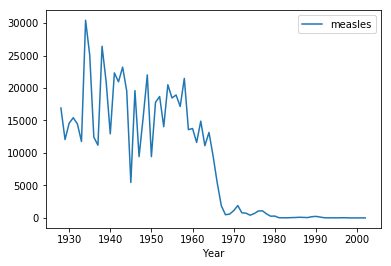

In [2]:
df = pd.read_csv('data/diseases.csv.gz')
measles = df[["Year","measles"]].groupby("Year").aggregate(np.sum)
measles.plot().get_figure().savefig('measles_by_year.pdf');

In [3]:
!ls -l measles_by_year.pdf

-rw-rw-r--  1 jbednar  staff  10228 Nov 29 09:42 measles_by_year.pdf


The above code works by getting a handle on the underlying Matplotlib figure, and so of course the same approach works for a native Matplotlib plot:

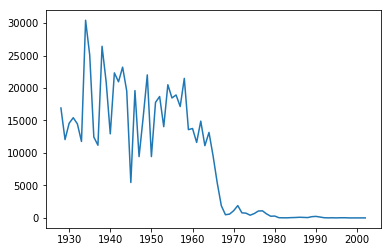

In [4]:
plt.plot(measles);
plt.savefig('measles_by_year2.pdf')

In [5]:
!ls -l measles_by_year2.pdf

-rw-rw-r--  1 jbednar  staff  7792 Nov 29 09:42 measles_by_year2.pdf


:Curve   [Year]   (measles)
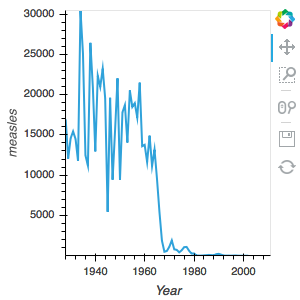

In [6]:
%%output filename="measles_by_year" fig="png"
curve = hv.Curve(measles.reset_index())
curve

In [7]:
!ls -l measles_by_year.png

-rw-rw-r--@ 1 jbednar  staff  20721 Nov 29 09:42 measles_by_year.png


HoloViews similarly uses the exporting capability of the underlying libraries, such as matplotlib:

In [8]:
%%output backend="matplotlib" filename="measles_by_year" fig="svg"
curve

:Curve   [Year]   (measles)

In [9]:
!open measles_by_year.png

# Report generation: HTML output

Because Bokeh is based on HTML, if your plot is based on Bokeh you can create “static” output that still supports dynamic interactivity (zooming, panning, selection, crossfiltering) in a webpage or blog post.

In [10]:
%%output filename='measles_by_year' 
curve

:Curve   [Year]   (measles)

In [11]:
!ls -l measles_by_year.html

-rw-rw-r--  1 jbednar  staff  23419 Nov 29 09:42 measles_by_year.html


# Report generation

With any of the tools covered here, you can also write the entire document as a Jupyter notebook then use nbconvert to create a standalone HTML page (see extensive examples at [holoviews.org](http://holoviews.org)).

# Live presentations

Note that if you are making a presentation, you don’t necessarily need to create static output; try using [RISE](https://github.com/damianavila/RISE) to run your live Jupyter notebook in fullscreen mode (such as this one!). It can be tricky to get the Jupyter Notebook extension installed and available, but once it is you can present your live, running results!  Just hit the "Enter/Exit RISE slideshow" button if it is available above, to see, which requires a live, running Python kernel.

# Moving on

The third and final part of this webinar focuses on ways you can put together the same sort of visualizations into mini applications with custom interactive controls, eventually leading to a custom dashboard capturing and sharing a particular approach to analysis based on these tools:

- [ipywidgets](http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) with interact for quick, one-off explorations tied to the notebook
- [parambokeh](https://ioam.github.io/parambokeh) for maintainable declarations of parameters of interest, with automatically generated widgets in notebooks or standalone servers
- [HoloViews Streams](http://holoviews.org/user_guide/Custom_Interactivity.html) for routing live data into visualizations
- [Bokeh server](https://bokeh.pydata.org/en/latest/docs/user_guide/server.html): Deploying live, runnable Python apps for sharing on the web

This approach to creating dashboards, as well as using many of these tools in general, is laid out at the new [PyViz](https://pyviz.github.io/pyviz) repository, which hosts the environment in which these examples are run, as well as a comprehensive set of tutorials showing how to use each of the tools covered here.